In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('train.csv')

In [4]:
df

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79848,48057,0.425,23367,224550,1.0,0.0,0.0,98.70,19,B,Urban,13800,1
79849,59012,0.704,19356,279150,1.0,0.0,1.0,99.42,12,A,Rural,28500,1
79850,77050,0.000,23372,305020,0.0,0.0,0.0,98.89,12,A,Rural,9600,1
79851,67225,0.398,22641,39330,0.0,0.0,0.0,98.68,8,A,Rural,5700,1


In [6]:
df.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


In [5]:
df.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,target
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,10924.507533,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,9401.676542,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,1200.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,5400.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,7500.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,13800.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,60000.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                79853 non-null  int64  
 1   perc_premium_paid_by_cash_credit  79853 non-null  float64
 2   age_in_days                       79853 non-null  int64  
 3   Income                            79853 non-null  int64  
 4   Count_3-6_months_late             79756 non-null  float64
 5   Count_6-12_months_late            79756 non-null  float64
 6   Count_more_than_12_months_late    79756 non-null  float64
 7   application_underwriting_score    76879 non-null  float64
 8   no_of_premiums_paid               79853 non-null  int64  
 9   sourcing_channel                  79853 non-null  object 
 10  residence_area_type               79853 non-null  object 
 11  premium                           79853 non-null  int64  
 12  targ

In [7]:
df.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
premium                                0
target                                 0
dtype: int64

In [8]:
df['age'] = df['age_in_days']//365

In [9]:
df.drop('age_in_days',axis =1, inplace =True)

In [10]:
df.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age
0,110936,0.429,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,33
1,41492,0.010,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,59
2,31300,0.917,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,48
3,19415,0.049,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,42
4,99379,0.052,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,86


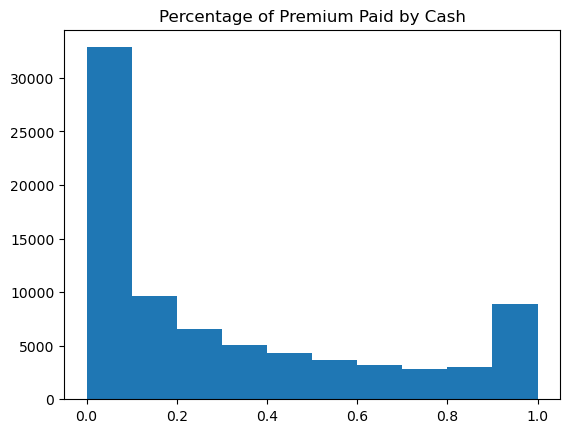

In [11]:
plt.hist(df.perc_premium_paid_by_cash_credit)
plt.title('Percentage of Premium Paid by Cash')
plt.show()


In [12]:
(df['perc_premium_paid_by_cash_credit'] <=0.1).sum()

32999

In [13]:
((df['perc_premium_paid_by_cash_credit'] >= 0.2) & (df['perc_premium_paid_by_cash_credit'] < 0.3)).sum()

6486

<AxesSubplot:xlabel='age', ylabel='Count'>

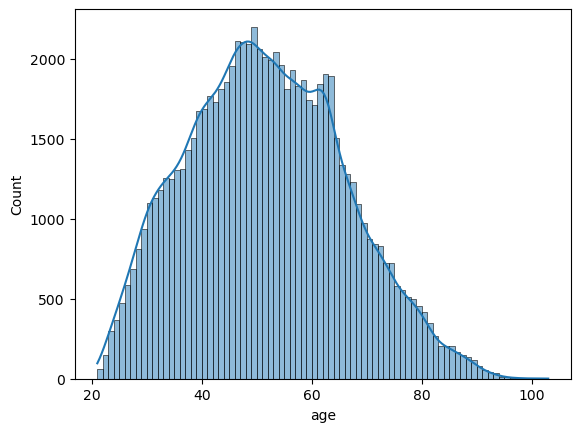

In [14]:
sns.histplot(df.age, kde=True, binwidth=1)

C:\Users\Sudheer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

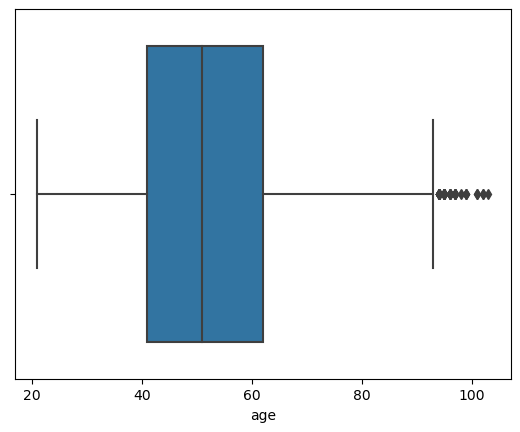

In [15]:
sns.boxplot(df['age'])

<AxesSubplot:xlabel='Count_3-6_months_late', ylabel='Count'>

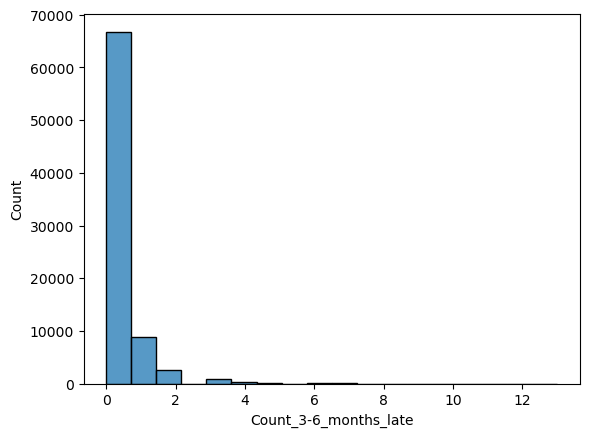

In [16]:
sns.histplot(df['Count_3-6_months_late'])

<AxesSubplot:xlabel='Count_6-12_months_late', ylabel='Count'>

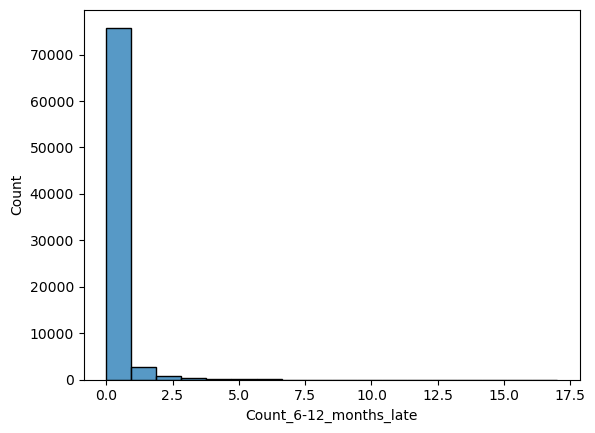

In [17]:
sns.histplot(df['Count_6-12_months_late'])


<AxesSubplot:xlabel='Count_more_than_12_months_late', ylabel='Count'>

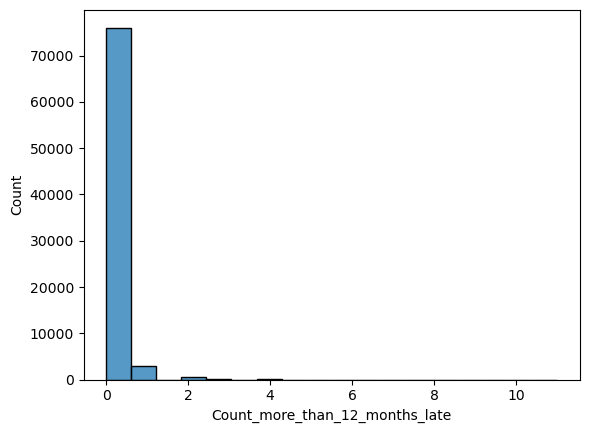

In [18]:
sns.histplot(df['Count_more_than_12_months_late'])

<AxesSubplot:xlabel='no_of_premiums_paid', ylabel='Count'>

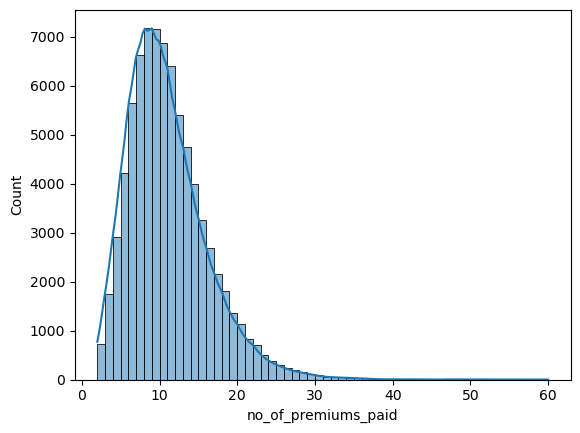

In [19]:
sns.histplot(df.no_of_premiums_paid, kde=True, binwidth=1)


C:\Users\Sudheer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_of_premiums_paid'>

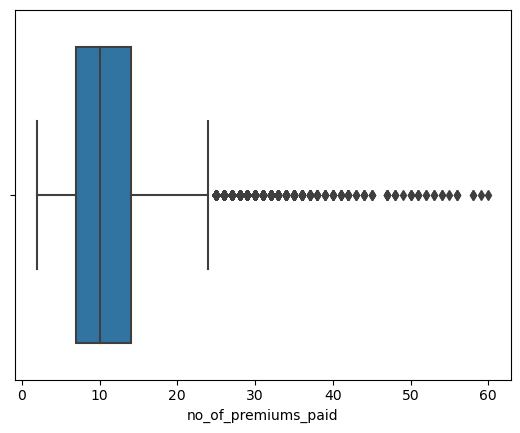

In [20]:
sns.boxplot(df.no_of_premiums_paid)

<AxesSubplot:xlabel='application_underwriting_score', ylabel='Count'>

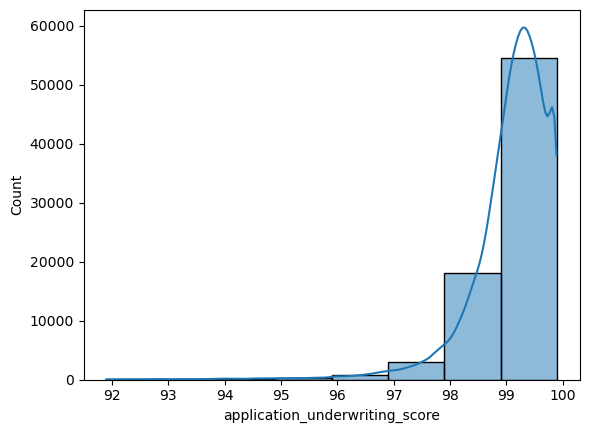

In [21]:
sns.histplot(df.application_underwriting_score, kde=True, binwidth=1)

<AxesSubplot:xlabel='residence_area_type', ylabel='Count'>

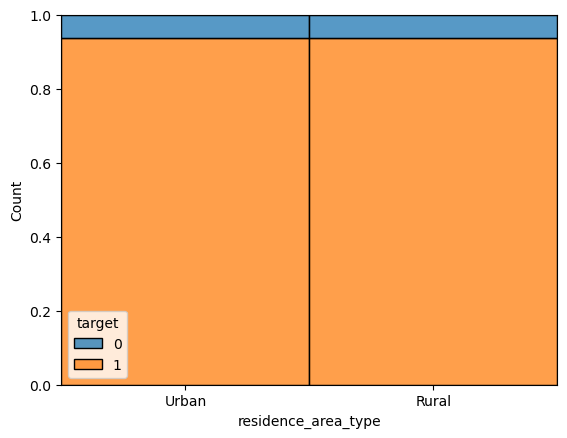

In [22]:
sns.histplot(data=df, x='residence_area_type', hue='target',multiple ='fill')

<AxesSubplot:xlabel='sourcing_channel', ylabel='Count'>

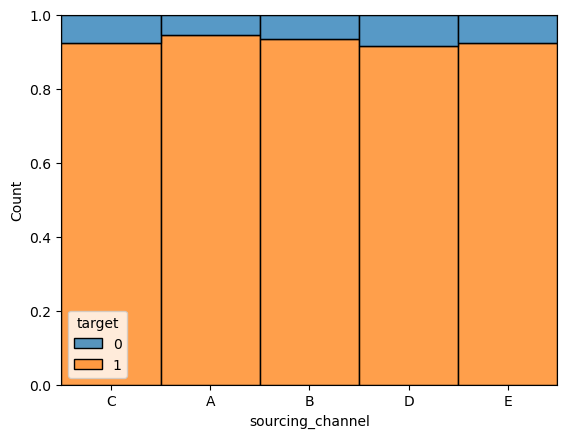

In [23]:
sns.histplot(data=df, x='sourcing_channel', hue='target',multiple ='fill')

In [24]:
df[['sourcing_channel', 'target']].groupby('sourcing_channel', as_index = False).mean()

,sourcing_channel,target
0,A,0.945542
1,B,0.935441
2,C,0.924994
3,D,0.916126
4,E,0.924466


<AxesSubplot:xlabel='Count_3-6_months_late', ylabel='age'>

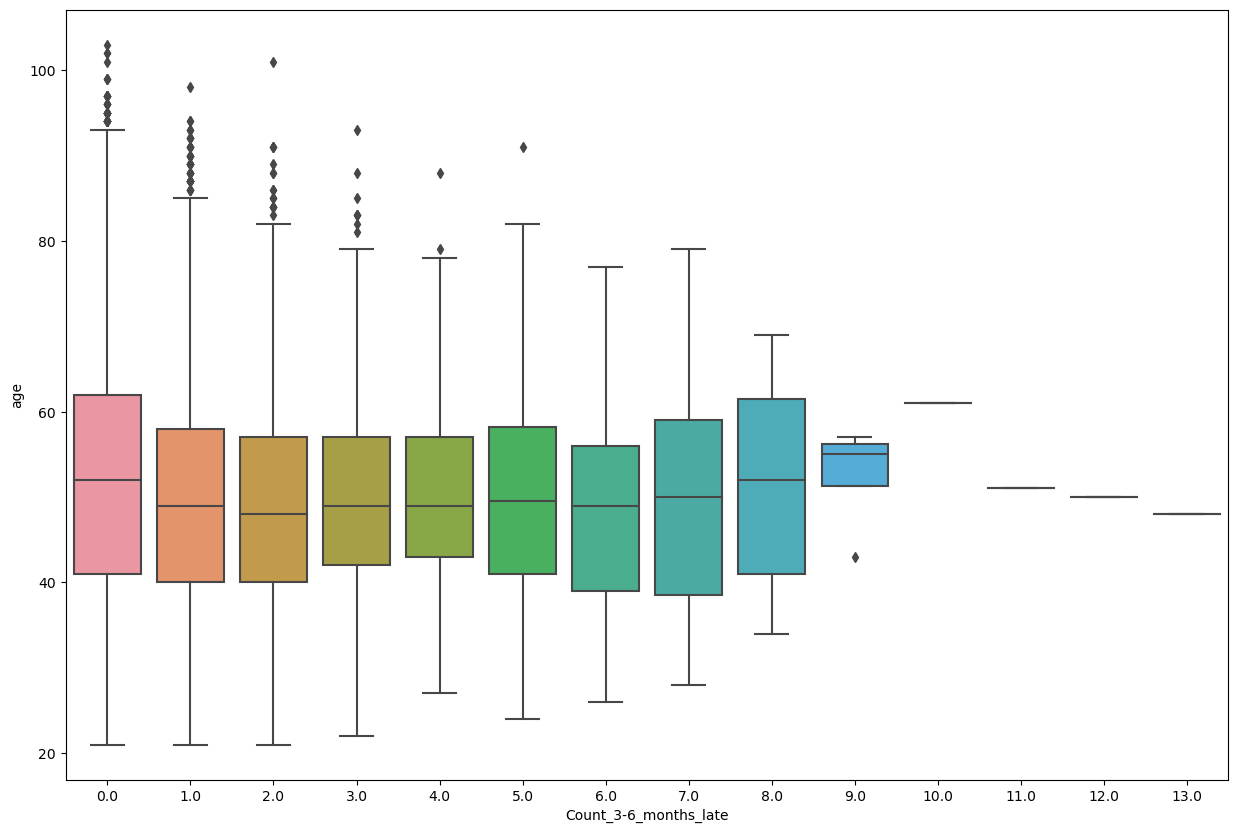

In [25]:
plt.figure(figsize= (15,10))
sns.boxplot(x=df['Count_3-6_months_late'], y=df['age'])

<AxesSubplot:xlabel='Count_6-12_months_late', ylabel='age'>

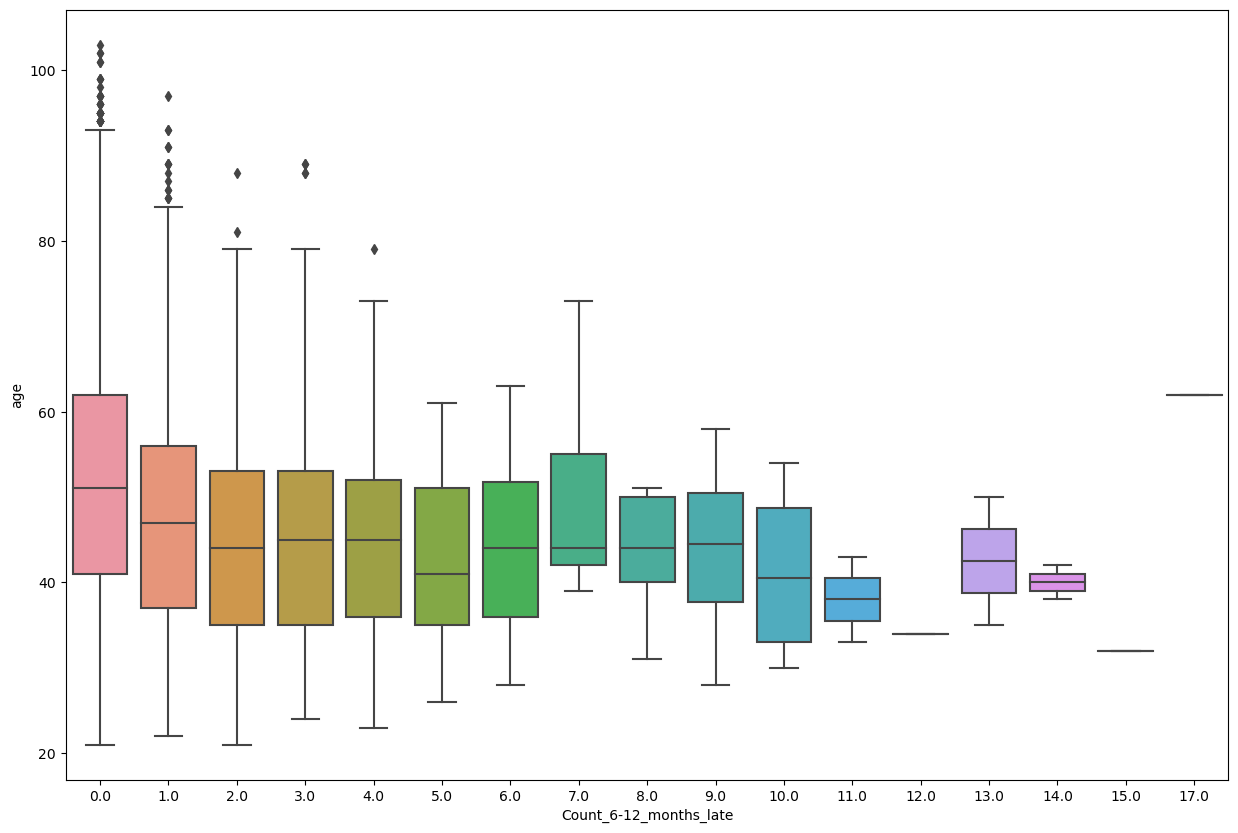

In [26]:
plt.figure(figsize= (15,10))
sns.boxplot(x=df['Count_6-12_months_late'], y=df['age'])

<AxesSubplot:>

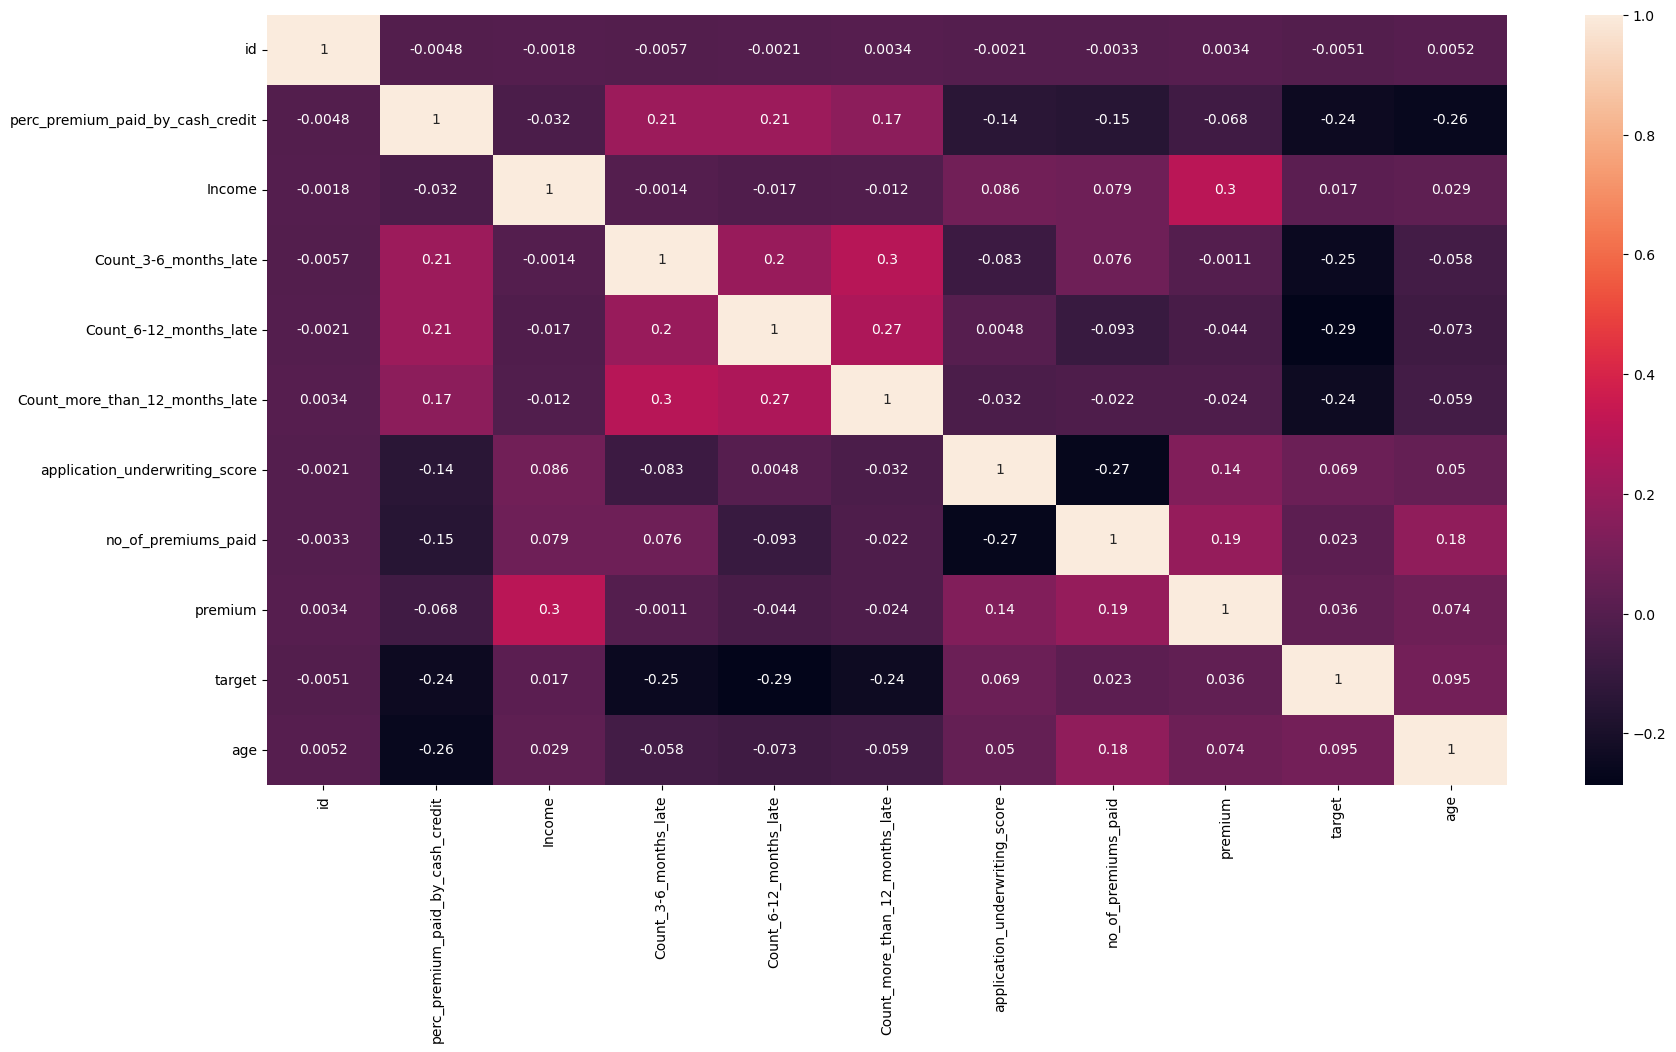

In [27]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True)

In [28]:
for col in df:
    if df[col].isnull().sum()>0:
        df[col].fillna(df[col].mean(),inplace=True)

In [29]:
df.isnull().sum().sum()

0

In [30]:
scaler = MinMaxScaler()
scaler = scaler.fit(df[['premium']])
x_scaled = scaler.transform(df[['premium']])
x_scaled

array([[0.03571429],
       [0.28571429],
       [0.03571429],
       ...,
       [0.14285714],
       [0.07653061],
       [0.14285714]])

In [31]:
df['premium'] = x_scaled

In [32]:
df.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age
0,110936,0.429,355060,0.0,0.0,0.0,99.02,13,C,Urban,0.035714,1,33
1,41492,0.010,315150,0.0,0.0,0.0,99.89,21,A,Urban,0.285714,1,59
2,31300,0.917,84140,2.0,3.0,1.0,98.69,7,C,Rural,0.035714,0,48
3,19415,0.049,250510,0.0,0.0,0.0,99.57,9,A,Urban,0.142857,1,42
4,99379,0.052,198680,0.0,0.0,0.0,99.87,12,B,Urban,0.142857,1,86


In [33]:
scaler = scaler.fit(df[['Income']])
x_scaled = scaler.transform(df[['Income']])
x_scaled

array([[0.00366839],
       [0.00322611],
       [0.00066612],
       ...,
       [0.00311386],
       [0.00016955],
       [0.00283814]])

In [34]:
df['Income'] = x_scaled

In [35]:
scaler = scaler.fit(df[['age']])
x_scaled = scaler.transform(df[['age']])
x_scaled

array([[0.14634146],
       [0.46341463],
       [0.32926829],
       ...,
       [0.52439024],
       [0.5       ],
       [0.26829268]])

In [36]:
df['age'] = x_scaled

In [37]:
scaler = scaler.fit(df[['no_of_premiums_paid']])
x_scaled = scaler.transform(df[['no_of_premiums_paid']])
x_scaled

array([[0.18965517],
       [0.32758621],
       [0.0862069 ],
       ...,
       [0.17241379],
       [0.10344828],
       [0.10344828]])

In [38]:
df['no_of_premiums_paid'] = x_scaled

In [39]:
df.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age
0,110936,0.429,0.003668,0.0,0.0,0.0,99.02,0.189655,C,Urban,0.035714,1,0.146341
1,41492,0.010,0.003226,0.0,0.0,0.0,99.89,0.327586,A,Urban,0.285714,1,0.463415
2,31300,0.917,0.000666,2.0,3.0,1.0,98.69,0.086207,C,Rural,0.035714,0,0.329268
3,19415,0.049,0.002510,0.0,0.0,0.0,99.57,0.120690,A,Urban,0.142857,1,0.256098
4,99379,0.052,0.001935,0.0,0.0,0.0,99.87,0.172414,B,Urban,0.142857,1,0.792683


In [40]:
df['application_underwriting_score'] = df['application_underwriting_score'] /100

In [41]:
df['residence_area_type'] = df['residence_area_type'].map( {'Urban' : 1, 'Rural' : 0} )

In [42]:
df['sourcing_channel'] = df['sourcing_channel'].map( {'A' : 0, 'B' : 1, 'C' : 2,'D':3,'E':4} )

In [43]:
df['latePayments'] = df['Count_3-6_months_late'] + df['Count_6-12_months_late'] + df['Count_more_than_12_months_late']

In [44]:
cols = ['Count_3-6_months_late' , 'Count_6-12_months_late' , 'Count_more_than_12_months_late']
for col in cols:
    df.drop(col,axis =1,inplace =True)

In [45]:
df.head()

,id,perc_premium_paid_by_cash_credit,Income,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age,latePayments
0,110936,0.429,0.003668,0.9902,0.189655,2,1,0.035714,1,0.146341,0.0
1,41492,0.010,0.003226,0.9989,0.327586,0,1,0.285714,1,0.463415,0.0
2,31300,0.917,0.000666,0.9869,0.086207,2,0,0.035714,0,0.329268,6.0
3,19415,0.049,0.002510,0.9957,0.120690,0,1,0.142857,1,0.256098,0.0
4,99379,0.052,0.001935,0.9987,0.172414,1,1,0.142857,1,0.792683,0.0


In [46]:
df.shape

(79853, 11)

In [47]:
x= df.drop('target' ,axis=1)
y = df['target']

(array([ 4998.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 74855.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

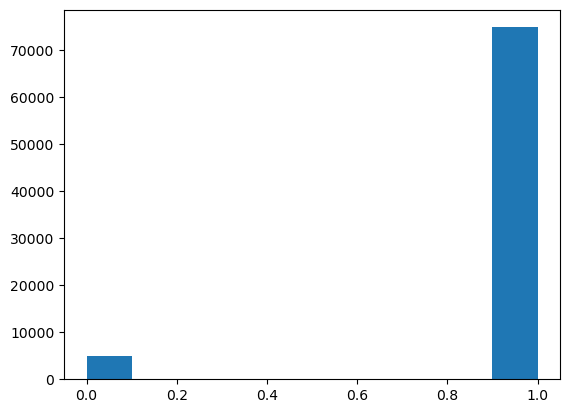

In [48]:
plt.hist(y)

In [49]:
rdsmple = RandomOverSampler()
x_sampled, y_sampled = rdsmple.fit_resample(x,y)

(array([74855.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 74855.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

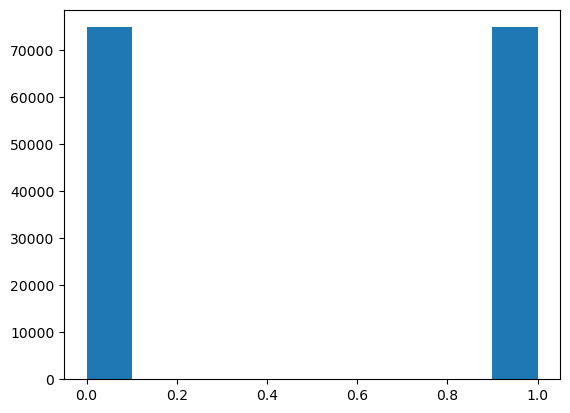

In [50]:
plt.hist(y_sampled)

In [51]:
train_x,test_x,train_y,test_y = train_test_split(x_sampled,y_sampled,random_state =365)

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix , accuracy_score

In [53]:
decision_tree = DecisionTreeClassifier(max_depth = 7)
decision_tree.fit(train_x, train_y)
Y_pred = decision_tree.predict(test_x)
conf_matrix = confusion_matrix(test_y,Y_pred)
accuracy = accuracy_score(test_y,Y_pred)
accuracy

0.7664315485732607

Note: you may need to restart the kernel to use updated packages.


In [55]:
from xgboost import XGBClassifier

In [56]:
xgb = XGBClassifier()
xgb.fit(train_x,train_y)
Y_pred = xgb.predict(test_x)
conf_matrix = confusion_matrix(test_y,Y_pred)
accuracy = accuracy_score(test_y,Y_pred)
accuracy


0.8621352997755691

In [57]:
xgb = XGBClassifier(objective='binary:logistic')

In [58]:
parameters = {"n_estimators": [100,130], "criterion" :['gini','entropy'], "max_depth":range(8,10,1)}

grid = GridSearchCV(xgb,parameters,verbose=3,cv=5)
grid.fit(train_x,train_y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[11:42:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "criterion" } are not used.

[CV 1/5] END criterion=gini, max_depth=8, n_estimators=100;, score=0.926 total time=   4.0s
[11:42:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "criterion" } are not used.

[CV 2/5] END criterion=gini, max_depth=8, n_estimators=100;, score=0.927 total time=   4.1s
[11:42:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "criterion" } are not used.

[CV 3/5] END criterion=gini, max_depth=8, n_estimators=100;, score=0.924 total time=   5.3s
[11:43:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu

[CV 4/5] END criterion=entropy, max_depth=8, n_estimators=130;, score=0.942 total time=   8.1s
[11:46:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "criterion" } are not used.

[CV 5/5] END criterion=entropy, max_depth=8, n_estimators=130;, score=0.936 total time=   8.3s
[11:46:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "criterion" } are not used.

[CV 1/5] END criterion=entropy, max_depth=9, n_estimators=100;, score=0.947 total time=   7.1s
[11:46:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "criterion" } are not used.

[CV 2/5] END criterion=entropy, max_depth=9, n_estimators=100;, score=0.943 total time=   7.0s
[11:46:47] WARNING: C:\

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

In [59]:
accuracy = grid.best_score_

In [60]:
accuracy

0.9579986386205936

In [61]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 9, 'n_estimators': 130}